# Comparision of counts filed

### Set up environment

In [50]:
!pip install oscn==0.0.0.25

import oscn

### Set up the OSCN information needed

In [88]:

years = ['2017','2018']
counties = ['mayes', 'love','rogers','delaware']
types =['CM','CF']

### Request the cases from OSCN and save as files
This takes a couple hours

In [28]:
import pickle


for county in counties:
  for year in years:
    for type in types:      
      cases=oscn.request.CaseList(type=type, year=year,county=county)
      all_cases = [c for c in cases]
      file_name = f'data/{type}.{county}.{year}.oscn'
      f = open(file_name, 'wb')
      pickle.dump(all_cases, f)
      f.close()
      print(f'{file_name}: {len(all_cases)}')


data/CF.mayes.2018.oscn: 270


### Retrieve the saved files

In [138]:
import pickle

years = ['2018']
counties = ['delaware']
types =['CF']
saved_cases = []

case_count =0 

for county in counties:
  for year in years:
    for type in types:      
      file_name = f'data/{type}.{county}.{year}.oscn'
      new_cases = pickle.load(open(file_name, 'rb'))
      new_case_count = len(new_cases)
      case_count += new_case_count
      print(f'{file_name} added {new_case_count}')
      saved_cases += new_cases
        
print(f'counted case: {case_count} length saved {len(saved_cases)}')


data/CF.delaware.2018.oscn added 337
counted case: 337 length saved 337


## Create a pandas dataframe

In [143]:
import re
import numpy as np
import pandas as pd

columns = ['Filed','County','Type', 'CaseNumber', 'Counts','Source']
case_data = lambda c: [c.filed, c.county, c.type, c.case_number ,c.counts, c.source]
%time all_cases = pd.DataFrame([case_data(c) for c in saved_cases], columns = columns)

CPU times: user 29.4 s, sys: 89.2 ms, total: 29.5 s
Wall time: 29.5 s


In [202]:
all_cases.head()

,Filed,County,Type,CaseNumber,Counts,Source,FiledDate
0,2018-01-03,delaware,CF,CF-2018-1,"[{'description': 'LARCENY FROM THE HOUSE, A FE...",https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03
1,2018-01-03,delaware,CF,CF-2018-2,[{'description': 'UNAUTHORIZED USE OF A VEHICL...,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03
2,2018-01-04,delaware,CF,CF-2018-3,[{'description': 'BAIL JUMPING - AFCF - FELONY...,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04
3,2018-01-03,delaware,CF,CF-2018-4,"[{'description': 'LEWD MOLESTATION, A FELONY'}...",https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03
4,2018-01-02,delaware,CF,CF-2018-5,"[{'description': 'BAIL JUMPING, A FELONY, in v...",https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-02


## Basic Reports

In [223]:
# convert the date from a string to a ptyhon DateTime type
all_cases['FiledDate'] = pd.to_datetime(all_cases['Filed'])

count_desc = [item for sublist in df['Counts'] for item in sublist] 
lens = df['Counts'].apply(len)
vals = range(all_cases.shape[0])
ilocations = np.repeat(vals, lens)
cols = [i for i,c in enumerate(all_cases.columns) if c != 'Counts']
count_frame = all_cases.iloc[ilocations, cols].copy()
count_frame['Count'] = [c['description'] for c in count_desc]
count_frame.head(25)

,Filed,County,Type,CaseNumber,Source,FiledDate,NumCounts,Count
0,2018-01-03,delaware,CF,CF-2018-1,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"LARCENY FROM THE HOUSE, A FELONY, in violation..."
0,2018-01-03,delaware,CF,CF-2018-1,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"PETIT LARCENY, A MISDEMEANOR, in violation of ..."
1,2018-01-03,delaware,CF,CF-2018-2,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,1,"UNAUTHORIZED USE OF A VEHICLE, A FELONY"
2,2018-01-04,delaware,CF,CF-2018-3,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,1,"BAIL JUMPING - AFCF - FELONY, in violation of ..."
3,2018-01-03,delaware,CF,CF-2018-4,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"LEWD MOLESTATION, A FELONY"
3,2018-01-03,delaware,CF,CF-2018-4,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"FORCIBLE ORAL SODOMY, A FELONY"
4,2018-01-02,delaware,CF,CF-2018-5,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-02,1,"BAIL JUMPING, A FELONY, in violation of 59 OS ..."
5,2018-01-04,delaware,CF,cmid:13268,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,7,MANUFACTURE OF CDS/POSS MATERIAL W/INTENT TO M...
5,2018-01-04,delaware,CF,cmid:13268,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,7,"CHILD NEGLECT, A FELONY, in violation of 21 OS"
5,2018-01-04,delaware,CF,cmid:13268,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,7,MAINTAIN PLACE FOR KEEPING/SELLING CONTROLLED ...


### Count of counts

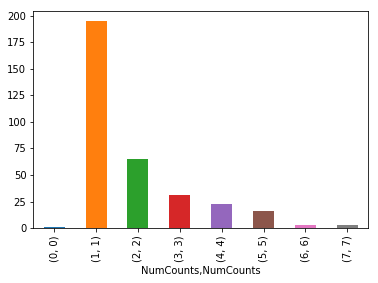

In [203]:
num_counts = lambda counts: len(counts) if counts else 0
all_cases['NumCounts'] = all_cases['Counts'].apply(num_counts)
all_cases.groupby(['NumCounts'])['NumCounts'].value_counts().plot.bar()



### Distribution of single count cases

In [237]:
import spacy
nlp = spacy.load('en')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import string
punctuations = string.punctuation

raw_tokens = lambda count: nlp(count, disable=['parser', 'ner'])
key_tokens =  lambda count: [tok.lemma_.lower().strip() for tok in raw_tokens(count) if tok.lemma_ != '-PRON-']
clean_tokens = lambda count: [tok for tok in key_tokens(count) if tok not in stopwords and tok not in punctuations]
token_str = lambda count: ' '.join(clean_tokens(count))

noun_chunks = lambda count:[c for c in nlp(count).noun_chunks][0].string

%time count_frame['CountTokens'] = count_frame['Count'].apply(noun_chunks)
count_frame.head(10)

CPU times: user 20.2 s, sys: 2.21 s, total: 22.5 s
Wall time: 5.66 s


,Filed,County,Type,CaseNumber,Source,FiledDate,NumCounts,Count,CountTokens
0,2018-01-03,delaware,CF,CF-2018-1,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"LARCENY FROM THE HOUSE, A FELONY, in violation...",LARCENY
0,2018-01-03,delaware,CF,CF-2018-1,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"PETIT LARCENY, A MISDEMEANOR, in violation of ...",PETIT LARCENY
1,2018-01-03,delaware,CF,CF-2018-2,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,1,"UNAUTHORIZED USE OF A VEHICLE, A FELONY",UNAUTHORIZED USE
2,2018-01-04,delaware,CF,CF-2018-3,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,1,"BAIL JUMPING - AFCF - FELONY, in violation of ...",BAIL JUMPING - AFCF - FELONY
3,2018-01-03,delaware,CF,CF-2018-4,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"LEWD MOLESTATION, A FELONY",LEWD MOLESTATION
3,2018-01-03,delaware,CF,CF-2018-4,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-03,2,"FORCIBLE ORAL SODOMY, A FELONY",FORCIBLE ORAL SODOMY
4,2018-01-02,delaware,CF,CF-2018-5,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-02,1,"BAIL JUMPING, A FELONY, in violation of 59 OS ...",BAIL JUMPING
5,2018-01-04,delaware,CF,cmid:13268,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,7,MANUFACTURE OF CDS/POSS MATERIAL W/INTENT TO M...,MANUFACTURE
5,2018-01-04,delaware,CF,cmid:13268,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,7,"CHILD NEGLECT, A FELONY, in violation of 21 OS",CHILD NEGLECT
5,2018-01-04,delaware,CF,cmid:13268,https://www.oscn.net/dockets/GetCaseInformatio...,2018-01-04,7,MAINTAIN PLACE FOR KEEPING/SELLING CONTROLLED ...,KEEPING/SELLING CONTROLLED SUBSTANCE


In [260]:
# count_frame.groupby(['CountTokens'])['Count'].count()
count_frame.nlargest(2,'Count')

TypeError: Column 'Count' has dtype object, cannot use method 'nlargest' with this dtype